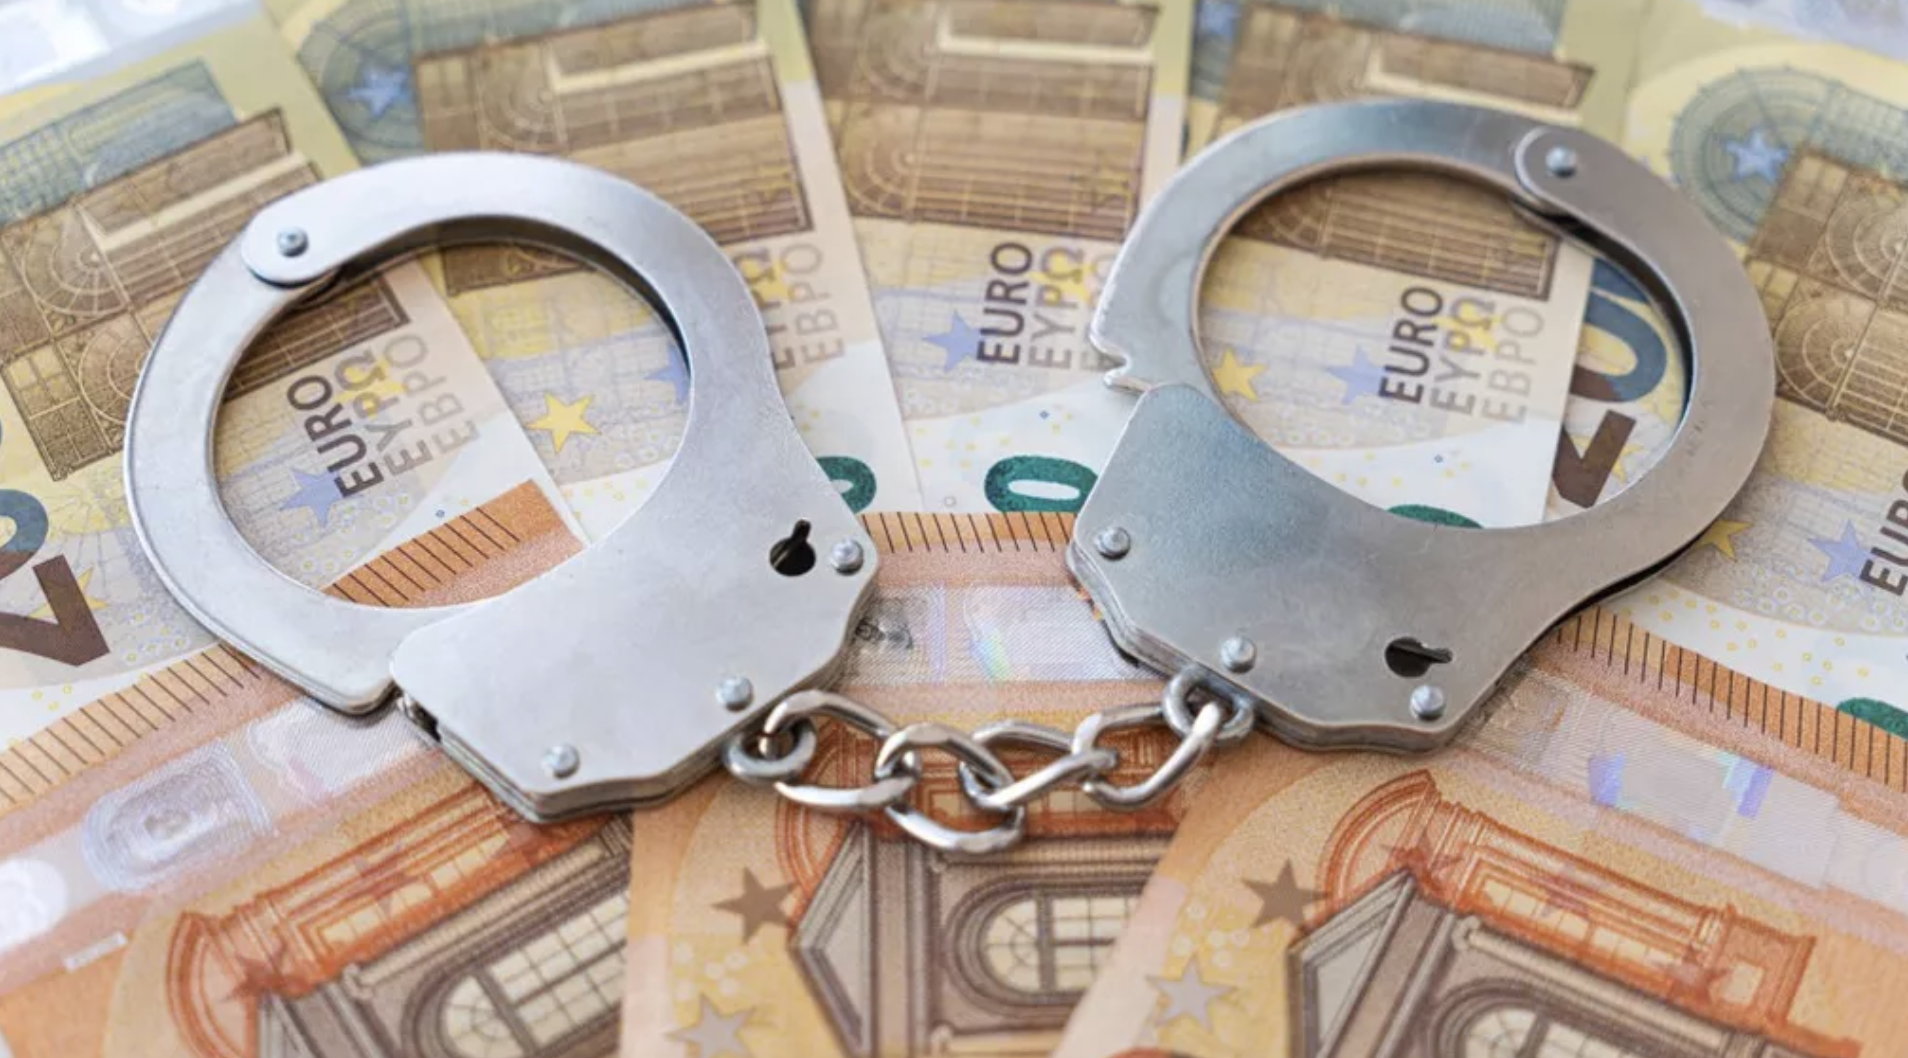
# Notre problèmatique

**Prédiction du taux de criminalité violente** 

En utilisant les caractéristiques socio-économiques et démographiques des crimes commis aux Etats-Unis, nous allons essayer de prédire le taux de criminalité violente dans différents états.

In [200]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/communities-and-crime/communities+and+crime/communities.names
/kaggle/input/communities-and-crime/communities+and+crime/communities.data


# I - Analyse des données du dataset

Dans le but de comprendre nos données , on a effectué certains tests liés aux élements qu'on a vu en classe 

In [201]:
import pandas as pd
import numpy as np

In [202]:
# Charger le fichier communities.data dans un DataFrame
communities_and_crime = pd.read_csv('/kaggle/input/communities-and-crime/communities+and+crime/communities.data')

# Redéfinition des noms de colonnes
communities_and_crime.columns=['state','county', 'community','communityname','fold','population', 'householdsize','racepctblack','racepctWhite','racepctasian',
                               'racepctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome', 'pctWWage', 'pctWFarmSelf',
                               'pctWInvInc', 'pctWSocSec', 'pctWPubAsst','pctWRetire', 'medFamInc', 'perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap',
                               'OtherPerCap','HispPerCap','NumUnderPov', 'PctPopUnderPov','PctLess9thGrade','PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 
                               'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam', 'PctFam2Par', 'PctKids2Par',
                               'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8', 
                               'PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10', 'PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 
                               'PersPerOwnOccHous','PersPerRentOccHous', 'PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
                               'PctVacMore6Mos', 'MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ',
                               'MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85',
                               'PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol',
                               'PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens',
                               'PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

# Afficher le nombre de lignes (crimes) commis
print("Nombre de crimes dans le dataset (lignes): \n ->", len(communities_and_crime))
print("=========================================")

# Afficher les noms des colonnes, qui sont les "features"
print("Nombre de colonnes : \n ->", len(communities_and_crime.columns))
print("=========================================")
print("Noms des features du dataset :\n\n", communities_and_crime.columns)


print("----------------------------------------------------------------------------------")
# Remplacer tous les "?" par NaN
communities_and_crime.replace('?', 0, inplace=True)

# Afficher un aperçu des données 
print(communities_and_crime.head())

Nombre de crimes dans le dataset (lignes): 
 -> 1993
Nombre de colonnes : 
 -> 128
Noms des features du dataset :

 Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racepctWhite', 'racepctasian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)
----------------------------------------------------------------------------------
   state county community        communityname  fold  population  \
0     53      0         0          Tukwilacity     1        0.00   
1     24      0         0         Aberdeentown     1        0.00   
2     34      5     81440  Willingborotownship     1        0.04   
3     42     95      6096    Bethlehemtownship     1        0.01   
4      6      0         0    SouthPasadenacity     1        0.

> * Nous remarquons donc que chaque **ligne** de notre dataset représente un **type de crime** différent qui a été commis aux US.
> * Par exemple, pour le premier crime, on peut voir la moyennes des nombre de personnes dans le foyer des cometteurs de crimes, leurs origines raciales, leurs tranches d'âge...etc.
> * D'apès la description du dataset sur 
[https://archive.ics.uci.edu/dataset/183/communities+and+crime](http://archive.ics.uci.edu/dataset/183/communities+and+crime), les 127 premières colonnes représentent des **features**, tandis que la dernière colonne (**ViolentCrimesPerPop**) représente la target.

Retrouver les états avec le plus de taux de criminalité

___
**Important ⚠️**

*US state (by number) - not counted as predictive, but if considered, should be consided nominal*

Les États ne peuvent pas être classés dans un ordre numérique significatif (comme on le ferait avec des nombres), mais ils représentent plutôt des catégories distinctes sans aucune hiérarchie intrinsèque. 
Ainsi, les États seront traités comme des catégories distinctes sans ordre spécifique.
___

In [203]:
# faire la somme des éléments présents dans chaque catégorie
counts=communities_and_crime.groupby('state').size()

#affichage du résultat
print(counts)

state
1      43
2       3
4      20
5      25
6     278
8      24
9      69
10      1
11      1
12     90
13     37
16      7
18     48
19     20
20      1
21     26
22     22
23     17
24     12
25    121
27      7
28     19
29     42
32      5
33     21
34    211
35     10
36     46
37     46
38      8
39    109
40     36
41     31
42    101
44     26
45     28
46      9
47     35
48    156
49     24
50      4
51     33
53     40
54     14
55     60
56      7
dtype: int64


In [204]:
print(communities_and_crime['population'])

count = communities_and_crime.groupby('population').size()

#affichage du résultat
print(count)

0       0.00
1       0.00
2       0.04
3       0.01
4       0.02
        ... 
1988    0.01
1989    0.05
1990    0.16
1991    0.08
1992    0.20
Name: population, Length: 1993, dtype: float64
population
0.00    385
0.01    454
0.02    271
0.03    193
0.04    121
       ... 
0.81      2
0.91      1
0.96      2
0.99      1
1.00     13
Length: 66, dtype: int64


> ViolentCrimesPerPop = total number of violent crimes per 100K population

> Dans notre cas, les valeurs sont continues et elles varient entre 0 et 1. Etant des valeurs pas très explicites, nous allons créer une nouvelle colonne nommée **Numeric_ViolentCrimesPerPop** qui va contenir des valeurs entières.

In [205]:
#### Transformer les données continues de la colonne ViolentCrimesPerPop en intervalles pour mieux voir leur fréquence

intervals = [(0.000, 0.067), (0.067, 0.133), (0.133, 0.200), (0.200, 0.267),
             (0.267, 0.333), (0.333, 0.400), (0.400, 0.467), (0.467, 0.533),
             (0.533, 0.600), (0.600, 0.667), (0.667, 0.733), (0.733, 0.800),
             (0.800, 0.867), (0.867, 0.933), (0.933, 1.000)]

values = [(0.000, 0.067), (0.067, 0.133), (0.133, 0.200), (0.200, 0.267),
             (0.267, 0.333), (0.333, 0.400), (0.400, 0.467), (0.467, 0.533),
             (0.533, 0.600), (0.600, 0.667), (0.667, 0.733), (0.733, 0.800),
             (0.800, 0.867), (0.867, 0.933), (0.933, 1.000)]

def map_values(x):
    for interval, value in zip(intervals, values):
        if interval[0] <= x and x <= interval[1]:
            return value
        
        
# Créer une nouvelle colonne avec les valeurs numériques des totaux de crimes violents
communities_and_crime['Numeric_ViolentCrimesPerPop'] = communities_and_crime['ViolentCrimesPerPop'].apply(map_values)

print("Les valeurs de la colonne Numeric_ViolentCrimesPerPop \naprès transformation :")
print("-------------------------------------------------------")
print(communities_and_crime[['ViolentCrimesPerPop', 'Numeric_ViolentCrimesPerPop']].head(6))

# Afficher les fréquences des intervalles de valeurs pour la colonne "Numeric_ViolentCrimesPerPop"

count = communities_and_crime.groupby('Numeric_ViolentCrimesPerPop').size()

#affichage du résultat
print("-------------------------------------------------------")
print(count)

# Re-typer les valeurs dans ViolentCrimesPerPop en float
communities_and_crime['ViolentCrimesPerPop'] = communities_and_crime['ViolentCrimesPerPop'].astype(float)
print("-------------------------------------------------------")
print(communities_and_crime[['ViolentCrimesPerPop']].head(5))

Les valeurs de la colonne Numeric_ViolentCrimesPerPop 
après transformation :
-------------------------------------------------------
   ViolentCrimesPerPop Numeric_ViolentCrimesPerPop
0                 0.67              (0.667, 0.733)
1                 0.43                (0.4, 0.467)
2                 0.12              (0.067, 0.133)
3                 0.03                (0.0, 0.067)
4                 0.14                (0.133, 0.2)
5                 0.03                (0.0, 0.067)
-------------------------------------------------------
Numeric_ViolentCrimesPerPop
(0.0, 0.067)      484
(0.067, 0.133)    420
(0.133, 0.2)      283
(0.2, 0.267)      177
(0.267, 0.333)    142
(0.333, 0.4)      113
(0.4, 0.467)       59
(0.467, 0.533)     76
(0.533, 0.6)       57
(0.6, 0.667)       38
(0.667, 0.733)     37
(0.733, 0.8)       20
(0.8, 0.867)       23
(0.867, 0.933)     14
(0.933, 1.0)       50
dtype: int64
-------------------------------------------------------
   ViolentCrimesPerPop
0  

In [206]:
#print(communities_and_crime['communityname'])

coun=communities_and_crime.groupby('communityname').size()

#affichage du résultat
print(coun)

communityname
Aberdeencity        2
Aberdeentown        1
Aberdeentownship    1
Adacity             1
AgouraHillscity     1
                   ..
Youngstowncity      1
YubaCitycity        1
Yucaipacity         1
Yukoncity           1
Zanesvillecity      1
Length: 1828, dtype: int64


# II - Application des algorithmes d'apprentissage supervisé sur les données : Prédiction du nombre de crimes violents


Pour notre tâche de prédiction de la colonne **ViolentCrimesPerPop** en utilisant des algorithmes d'apprentissage supervisé, nous allons considérer plusieurs algorithmes adaptés à une tâche de régression, étant donné que nous prédisons une valeur numérique. 

Voici les algorithmes d'apprentissage supervisés sur lesquels on va entrainer nos modèles :

1. *Régression linéaire :*
    * C'est le choix de base pour les problèmes de régression, notamment lorsque les relations entre les caractéristiques et la variable cible sont linéaires.
    * Simple à comprendre et à interpréter, ce qui en fait un bon point de départ.
    
    
2. *Arbres de décision :*
    * Flexibles et peuvent capturer des relations non linéaires entre les caractéristiques et la variable cible.
    * Peuvent gérer différents types de données et sont relativement robustes au bruit et aux valeurs aberrantes.


3. *Forêts aléatoires :*
    * Ensembles d'arbres de décision qui réduisent le surajustement et améliorent la généralisation en agrégeant les prédictions de plusieurs arbres.
    * Robustes et offrent généralement de bonnes performances sans nécessiter beaucoup de réglages d'hyperparamètres.


4. *Réseaux de neurones artificiels :*
    * Peuvent capturer des relations complexes et non linéaires entre les caractéristiques et la variable cible.
    * Ils sont particulièrement utiles lorsque les données sont très complexes ou lorsque les autres algorithmes ne parviennent pas à capturer les modèles de manière adéquate.

## Selon Critères démographiques

> On va appliquer l'algorithme de **regression linéaire** en prenant en compte deux features : 
> *     **FemalePctDiv:** pourcentage de femmes divorcées
> *     **MalePctDivorce:** pourcentage d'hommes divorcés

## Protocole experimental : 
couper les données en deux parties : 80% pour l'apprentissage et 20% pour la validation.

In [207]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(communities_and_crime[['FemalePctDiv', 'MalePctDivorce']], communities_and_crime['ViolentCrimesPerPop'], test_size=0.2, random_state=42)

In [208]:
from sklearn.metrics import mean_squared_error

### 1. Algorithme de Regression linéaire :

In [209]:
from sklearn.linear_model import LinearRegression

# Initialiser le modèle
linear_reg = LinearRegression()

# Entraîner le modèle
linear_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_linear = linear_reg.predict(X_test)

# Évaluer les performances du modèle
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Linear Regression):", mse_linear)

Mean Squared Error (Linear Regression): 0.03797742057500132


### 2. Algorithme d'Arbres de Décision

In [210]:
from sklearn.tree import DecisionTreeRegressor

# Initialiser le modèle
decision_tree_reg = DecisionTreeRegressor()

# Entraîner le modèle
decision_tree_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_tree = decision_tree_reg.predict(X_test)

# Évaluer les performances du modèle
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Decision Tree):", mse_tree)

Mean Squared Error (Decision Tree): 0.060629297410192136


### 3. Algorithme de Fôrets aléatoires

In [211]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle
random_forest_reg = RandomForestRegressor()

# Entraîner le modèle
random_forest_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_forest = random_forest_reg.predict(X_test)

# Évaluer les performances du modèle
mse_forest = mean_squared_error(y_test, y_pred_forest)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Random Forest):", mse_forest)

Mean Squared Error (Random Forest): 0.04593476516871577


In [212]:
from sklearn.preprocessing import StandardScaler

### 4. Algorithme de Réseaux de neurones artificiels

> import tensorflow as tf
> from tensorflow import keras
> 
> # Normaliser les caractéristiques
> scaler = StandardScaler()
> X_train_scaled = scaler.fit_transform(X_train)
> X_test_scaled = scaler.transform(X_test)
> 
> # Créer le modèle de réseau de neurones
> model = keras.Sequential([
>     keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
>     keras.layers.Dense(64, activation='relu'),
>     keras.layers.Dense(1)  # Couche de sortie pour la prédiction
> ])
> 
> # Compiler le modèle
> model.compile(optimizer='adam', loss='mean_squared_error')
> 
> # Entraîner le modèle
> model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)  # Utilisation de la validation croisée
> 
> # Évaluer le modèle sur l'ensemble de test
> mse = model.evaluate(X_test_scaled, y_test)
> print("Mean Squared Error (Neural Network):", mse)
> 

### 5. Algorithme K-NN

> from sklearn.neighbors import KNeighborsClassifier
> import time
> 
> knn_classifier = KNeighborsClassifier(n_neighbors=1)
> 
> start_time = time.time()
> 
> knn_classifier.fit(X_train, y_train)
> 
> end_time = time.time()
> 
> training_time = end_time - start_time
> print("Temps d'apprentissage avec K-NN (k=1) :", training_time, "secondes")
> 
> #________________________
> 
> start_time = time.time()
> 
> # Effectuer les prédictions sur les données de validation
> y_pred = knn_classifier.predict(x_test)
> 
> end_time = time.time()
> prediction_time = end_time - start_time
> 
> # Calculer l'erreur de prédiction en utilisant accuracy_score
> prediction_accuracy = accuracy_score(y_test, y_pred)
> 
> print("Temps de prédiction avec K-NN (k=1) :", prediction_time, "secondes")
> print("Erreur de prédiction avec K-NN (k=1) :", prediction_accuracy)

In [217]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle KNN
knn = KNeighborsRegressor(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins selon vos besoins

# Entraîner le modèle
knn.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (KNN):", mse)

Mean Squared Error (KNN): 0.04416240601503759


In [128]:
x_train, x_test=train_test_split(communities_and_crime, test_size=0.2,random_state=42)
print( (x_train))

      state county community    communityname  fold  population  \
1378     28      0         0       McCombcity     7        0.00   
1826      1      0         0       Hoovercity    10        0.05   
678      55    133     56375    NewBerlincity     4        0.04   
1083     45      0         0         Irmotown     6        0.00   
1558     40      0         0   Stillwatercity     8        0.04   
...     ...    ...       ...              ...   ...         ...   
1130      6      0         0  SierraMadrecity     6        0.00   
1294     22      0         0   Alexandriacity     7        0.06   
860       4      0         0      Douglascity     5        0.00   
1459      9      5     80490    Watertowntown     8        0.02   
1126     34      3     72420   Tenaflyborough     6        0.01   

      householdsize  racepctblack  racepctWhite  racepctasian  ...  PopDens  \
1378           0.40          0.90          0.29          0.01  ...     0.13   
1826           0.35          0.06    

In [14]:
from sklearn.model_selection import train_test_split
               # Variable cible ('label')

#separation de la data
Xtrain_data, Xtest_data,Ytrain_data, Ytest_data=train_test_split(communities_and_crime['county'],communities_and_crime['communityname'], test_size=0.21, random_state=42)

#print train
print(Xtrain_data)

1774     0
590     43
432      0
1317     0
948      0
        ..
1130     0
1294     0
860      0
1459     5
1126     3
Name: county, Length: 1574, dtype: object


In [9]:
from sklearn.model_selection import train_test_split
               # Variable cible ('label')

#separation de la data
Xtrain_data, Xtest_data,Ytrain_data, Ytest_data=train_test_split(communities_and_crime['ViolentCrimesPerPop'],communities_and_crime['population'], test_size=0.21, random_state=42)

#print train
print(Xtrain_data)

1774    0.83
590     0.87
432     0.18
1317    0.03
948     0.14
        ... 
1130    0.06
1294    1.00
860     0.07
1459    0.08
1126    0.02
Name: ViolentCrimesPerPop, Length: 1574, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

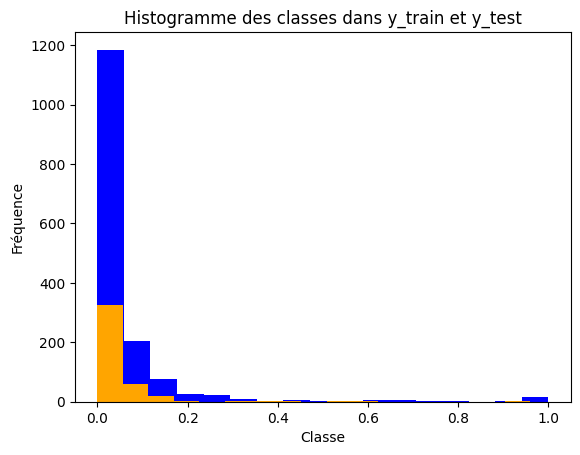

In [17]:
import matplotlib.pyplot as plt

plt.hist(Ytrain_data, bins=17, color='blue', label='y_train')
plt.hist(Ytest_data, bins=17, color= 'orange', label= 'y_test')
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.title('Histogramme des classes dans y_train et y_test')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

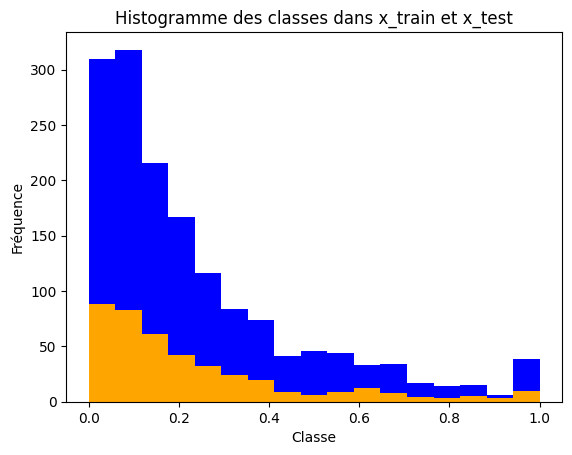

In [21]:
import matplotlib.pyplot as plt

plt.hist(Xtrain_data, bins=17, color='blue', label='y_train')
plt.hist(Xtest_data, bins=17, color= 'orange', label= 'y_test')
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.title('Histogramme des classes dans x_train et x_test')
plt.show

moyenne et variance de la population

In [22]:
pop=communities_and_crime['population']

moy0=np.mean(pop,axis=0)
print(moy0)

var0=np.var(pop,axis=0)
print(var0)

0.057526342197691926
0.01609628944658034


moyenne et variance des crimes

In [23]:
violent=communities_and_crime['ViolentCrimesPerPop']

moy1=np.mean(violent,axis=0)
print(moy1)

var1=np.var(violent,axis=0)
print(var1)

0.23799799297541396
0.05428124033716604
